# Code for "Optimal allocation of finite sampling capacity in accumulator models of multialternative decision making" paper.

For documentation, use '?function', where 'function' is the function that you want to know about.

In [1]:
using PyPlot

In [2]:
using CurveFit, SpecialFunctions, Distributions, LambertW, LaTeXStrings, LinearAlgebra, DelimitedFiles

In [3]:
push!(LOAD_PATH, "./")
using accumulator_functions
rc("text", usetex=true)
rc("font",family="serif", serif = "Computer Modern")

┌ Info: Recompiling stale cache file /Users/jorgeramirezruiz/.julia/compiled/v1.1/accumulator_functions.ji for accumulator_functions [top-level]
└ @ Base loading.jl:1184


# Figure 3

In [4]:
?compute_even_allocation

search: compute_even_allocation



```
compute_even_allocation(σ,μ_0,σ_0_G,N_points,utility_plots = false,N_sim_scale = 1E6, sim = false)
```

Computes expected utility for Gaussian, uniform and bimodal priors. It has two general methods: `utility_plots = true` refers to figure 3 and `false` is for figure 4.

# Arguments

  * `σ_0_G`: the standard deviation of Gaussian and common stdev for bimodal.
  * `μ_0`: the mean for Gaussian.
  * `N_sim_scale`: a measure of the number of Monte Carlo simulations to be used for each prior.
  * `N_points`: the number of points used for numerical integration of analytical expressions.
  * `sim`: a boolean to compute simulations or not.

# Output

If `utility_plots = true`, it returns a tuple `(C,M, Us_simG,Us_anG)`.

  * `C` is the several capacities at which we compute expected utility.
  * `M` is the number of sampled accumulators.
  * `Us_simG` is the simulated expected utility.
  * `Us_anG` is the numerically integrated expected utility.

For Gaussian prior.

If `utility_plots = false`, it returns a tuple containing the optimal Ms, `(C,M_optG, M_optF, M_optB, M_opt_simG, M_opt_simF, M_opt_simB, M_opt_simG_def, M_opt_simF_def, M_opt_simB_def)`

  * `G,F,B` refer to Gaussian, uniform and bimodal priors, respectively.
  * `def` subscript refers to the case when a default option can be chosen.
  * `sim` referes to simulations, its absence means it is numerical integration.


In [5]:
N_points = 1E5
σ = 1
μ_0 = 0.5
σ_0_G = 1
utility_plots = true
#For paper, 1E5
N_sim = 1E4
sim = true
@time C,Us = compute_even_allocation(σ,μ_0,σ_0_G,N_points,utility_plots,N_sim,sim);

 61.070935 seconds (2.72 M allocations: 278.630 MiB, 0.14% gc time)


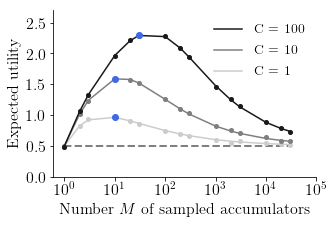

In [6]:
M = Us[1]
plot_utility_even(C,M,Us[2],Us[3]);
#savefig("figures/fig3.pdf")

# Figure 4

In [7]:
N_points = 1E5
σ = 1
μ_0 = 0.5
σ_0_G = 1/sqrt(12)
utility_plots = false
#A measure of number of simulations, currently we use
#more simulations for smaller capacities than for large ones.
N_sim_scale = 1E6
#If sim = false, it takes around 10 seconds to run, otherwise around half a day
sim = false
@time C,M_opts = compute_even_allocation(σ,μ_0,σ_0_G,N_points,utility_plots,N_sim,sim);

  9.755587 seconds (1.21 M allocations: 1.900 GiB, 2.39% gc time)


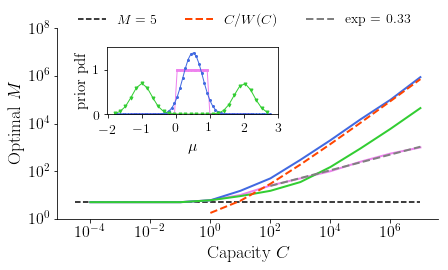

In [8]:
plot_Mopt_vs_C(C,M_opts[1],M_opts[2],M_opts[3],M_opts[4],M_opts[5],M_opts[6],M_opts[7],M_opts[8],M_opts[9],sim)
#savefig("figures/fig4.pdf");

In [ ]:
# Script to save precious data
# io = open("M_opts.dat", "w")
# writedlm(io, M_opts);
# close(io)


# To read precious data
# M_opts_read = readdlm("M_opts.dat");

# Figure 5

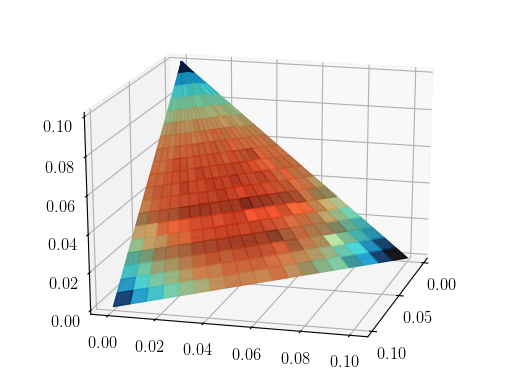

441.403073 seconds (1.08 k allocations: 126.359 KiB)


In [15]:
T = 0.1
σ = 1
μ_0 = 0.5
σ_0 = 1
#Number of points in the triangle, 50 points used in paper
N_xy = 20
N_z = 20
#1E7 simulations take ~10 min
N_sim = 1E7
#colorbar = true means we plot only the colorbar in Fig. 5c
colorbar = false
@time plot_utility_triangle(T,σ,μ_0,σ_0,N_xy,N_z,N_sim,colorbar)

In [16]:
T = 0.1
σ = 1
μ_0 = 0.5
σ_0 = 1
#Number of points between symmetric even allocations
N_ts = 5
#In paper, we used 5E8 simulations
N_sim = 1E7
#For now, only Gaussian prior can be used
prior = "Gaussian"
#default = true computes expected utility for the case when a default option can be chosen
default = false
@time U_directions = utility_directions(T,σ,μ_0,σ_0,N_ts,N_sim,prior,default);

 67.178284 seconds (484.37 k allocations: 24.226 MiB, 0.15% gc time)


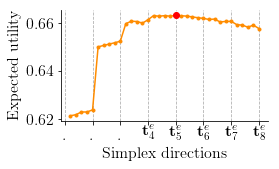

PyObject Text(22.200000000000003, 0.5, 'Expected utility')

In [17]:
plot_directions(N_ts,U_directions)
#savefig("figures/fig5d.pdf")

## Projected gradient method with linear constraint

In [ ]:
Ts = [0.1,1,5]
M_even = 10
initial_M = [2*5,2*6,2*9]
σ = 1
σ_0 = 1
#Number of random points for each capacity value
N_points = 10
#We can also descend the expected utility landscape with -1
sign_ascent = 1
#In principle, the step size η is adaptable, this value is the default one.
η = 0.1
N_steps = 300
@time meanss,stdss = compute_ascent_CV(Ts,σ,σ_0,N_points,initial_M,sign_ascent,η,N_steps);

In [ ]:
plot_ascent_random(meanss,stdss,Ts,N_points)
#savefig("figures/fig5e.pdf")

In [ ]:
# Script to save precious data
# io = open("CV_stdss.txt", "w")
# writedlm(io, stdss)
# close(io)
# io = open("CV_meanss.txt", "w")
# writedlm(io, meanss)
# close(io)

# Script to read precious data
# CV_data = readdlm("CV_stdss.txt")
# CV_reshaped = reshape(CV_data,(3,10,300));